In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
def linContrastStretching(im, a,b):
    cv2.calcHist([gray], [0], None, [256], [0, 256])
    # plt.hist(im.ravel(),256,[0,256]); plt.show()
    min_val = np.amin(im)
    max_val = np.amax(im)
#     print(min_val, max_val)
#     print(im.dtype)
    im = (im - min_val)*((b-a) /(max_val-min_val)) + a  
    return im.astype(np.uint8)

In [3]:
def dominant_colors(im, k):
    array = im.flatten()
    counts = np.bincount(array)
    colors = counts.argsort()[-k:][::-1]
    return colors

In [4]:
def color_bar(img, k):
    colors = dominant_colors(img, k)
    colors = np.rint(colors)
    image = np.zeros((50, k*100), np.uint8)
    for i in range(k):
        image[:, i*100:(i+1)*100] = colors[i]
    return image

In [5]:
img = cv2.imread('street.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
k = 10

In [6]:
p = linContrastStretching(gray, 0,255)

col_bar_orig = color_bar(gray, k)
col_bar_con = color_bar(p, k)

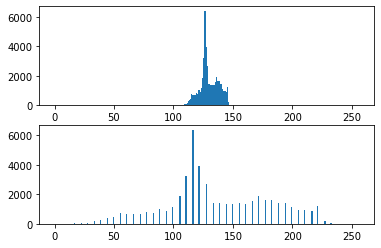

In [7]:
plt.figure(1)
plt.subplot(211)
plt.hist(gray.ravel(),256,[0,256])
plt.subplot(212)
plt.hist(p.ravel(), 256, [0, 256])
plt.show()

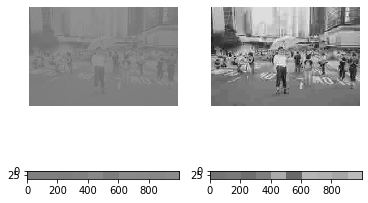

In [8]:
plt.figure(2)
plt.axis('off')
plt.subplot(221)
plt.axis("off")
plt.imshow(gray, 'gray', vmin=0, vmax=255)
plt.subplot(222)
plt.axis('off')
plt.imshow(p, 'gray', vmin=0, vmax=255)
plt.subplot(223)
# plt.axis('off')
plt.imshow(col_bar_orig, 'gray',vmin=0, vmax=255)
plt.subplot(224)
# plt.axis('off')
plt.imshow(col_bar_con, 'gray', vmin=0, vmax=255)
plt.show()

The colors that are to right of color bar are more frequently occuring than the ones to the left.
From above we can see that the two images are visually different and also their corresponding color bars. 
Most frequent color in original image is somewhat between black and gray, whereas the most frquent color in the contrast stretched image is between gray and white 

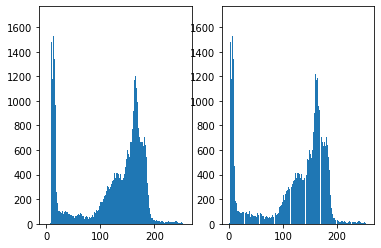

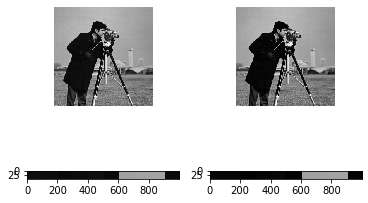

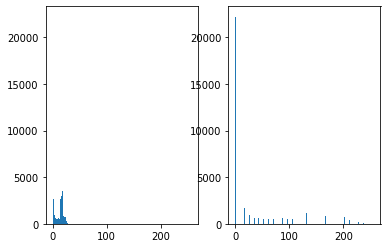

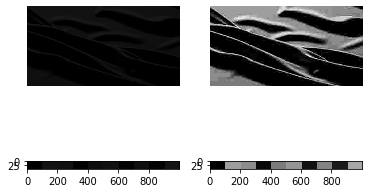

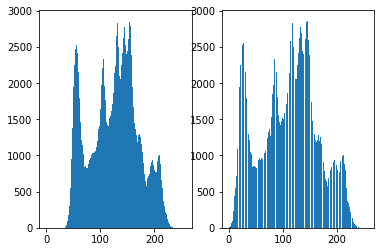

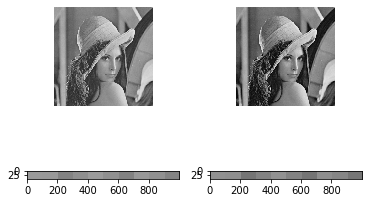

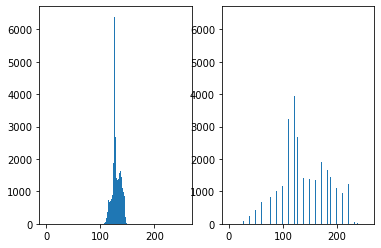

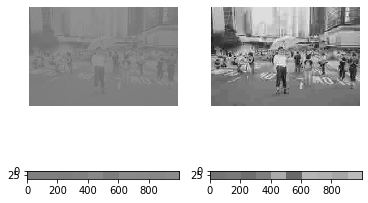

In [9]:
images = ["cameraman.png", "index.jpeg", "lena.jpg", "street.jpeg"]
k=10
for image in images:
    im = cv2.imread(image)
    gry = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    strchd = linContrastStretching(gry, 0,255)

    cbo = color_bar(gry, k)
    cbc = color_bar(strchd, k)
    plt.figure(1)
    plt.subplot(121)
    plt.hist(gry.ravel(),256,[0,256])
    plt.subplot(122)
    plt.hist(strchd.ravel(), 256, [0, 256])
    plt.show()
    plt.figure(2)
    plt.axis('off')
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(gry, 'gray', vmin=0, vmax=255)
    plt.subplot(222)
    plt.axis('off')
    plt.imshow(strchd, 'gray', vmin=0, vmax=255)
    plt.subplot(223)
    # plt.axis('off')
    plt.imshow(cbo, 'gray',vmin=0, vmax=255)
    plt.subplot(224)
    # plt.axis('off')
    plt.imshow(cbc, 'gray', vmin=0, vmax=255)
    plt.show()

From the above we can see that for those images which have similar range to (a,b) no much effect for the colorbar is recognised, but for images which have huge differences in the ranges of their histograms and (a,b) then their is a significant difference in the color bars